In [1]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('salesdata.csv')

In [3]:
df.head()

,CompPrice,Income,Advertising,Population,Price,Quality,Age,Education,Urban,US,SalesCat
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,141,64,3,340,128,Bad,38,13,Yes,No,No


In [12]:
X = df.drop(['SalesCat'],axis=1)
Y = df['SalesCat']

In [13]:
X

,CompPrice,Income,Advertising,Population,Price,Quality,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [14]:
Y

0      Yes
1      Yes
2      Yes
3       No
4       No
      ... 
395    Yes
396     No
397     No
398     No
399    Yes
Name: SalesCat, Length: 400, dtype: object

The random_state parameter present for decision trees in scikit-learn determines which feature to select for a split if (and only if) there are two splits that are equally good

In [15]:
dt = tree.DecisionTreeClassifier(random_state=100)

#### In fit function, we give both X and Y to train model and learn the relationship between input (X) and output (Y)

In [16]:
dtmodel = dt.fit(X, Y)

ValueError: could not convert string to float: 'Bad'

In [17]:
X = pd.get_dummies(X, columns = ['Quality','Urban','US'], dtype=int)

In [18]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,Quality_Bad,Quality_Good,Quality_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


random_state controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls

X_ are all Input data. y_ are all Output data. _train are all train set data. _test are all test data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [20]:
X_train.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Quality_Bad,Quality_Good,Quality_Medium,Urban_No,Urban_Yes,US_No,US_Yes
234,115,62,11,289,129,56,16,0,1,0,1,0,0,1
45,141,63,0,168,135,44,12,1,0,0,0,1,0,1
171,93,106,12,416,55,75,15,0,0,1,0,1,0,1
47,126,98,0,173,108,55,16,1,0,0,0,1,1,0
265,130,35,10,402,129,39,17,1,0,0,0,1,0,1


In [21]:
y_train.head()

234    Yes
45      No
171    Yes
47      No
265     No
Name: SalesCat, dtype: object

#### In fit function (also called train the function), we give both X and Y to train model and learn the relationship between input (X) and output (Y)

In [23]:
dtmodel = dt.fit(X_train, y_train)

#### In predict fuction, we give only X and ask model to predict Y

In [24]:
train_pred = dtmodel.predict(X_train)

In [25]:
train_pred

array(['Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
 

#### As a rule of thumb, we evaluate both the training and testing accuracy to validate the model. Usually training set accuracy is higher than testing set accuracy because we expose our training set output (Y) to model during training 

In [26]:
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

train_pred is the prediction from the model, and y_train is the original (real) prediction from data

X_test is the set never exposed to our model. And it can be treated as new or unknown inputs to our model

In [27]:
test_pred = dtmodel.predict(X_test)

In [28]:
test_pred

array(['No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes'],
      dtype=object)

y_test is the original (real) prediction from data, which is never exposed to the model

In [29]:
acc = accuracy_score(test_pred, y_test)
acc*100

73.33333333333333

In [ ]:
# We observe overfitting above. Lets see the tree if it is complex or not.

In [30]:
text_representation = tree.export_text(dtmodel)
print(text_representation)

|--- feature_8 <= 0.50
|   |--- feature_4 <= 106.50
|   |   |--- feature_0 <= 125.50
|   |   |   |--- feature_5 <= 64.50
|   |   |   |   |--- feature_1 <= 47.50
|   |   |   |   |   |--- feature_4 <= 86.50
|   |   |   |   |   |   |--- feature_2 <= 7.00
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- feature_2 >  7.00
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |--- feature_4 >  86.50
|   |   |   |   |   |   |--- class: No
|   |   |   |   |--- feature_1 >  47.50
|   |   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 86.50
|   |   |   |   |   |   |   |--- feature_1 <= 111.50
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- feature_1 >  111.50
|   |   |   |   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- f

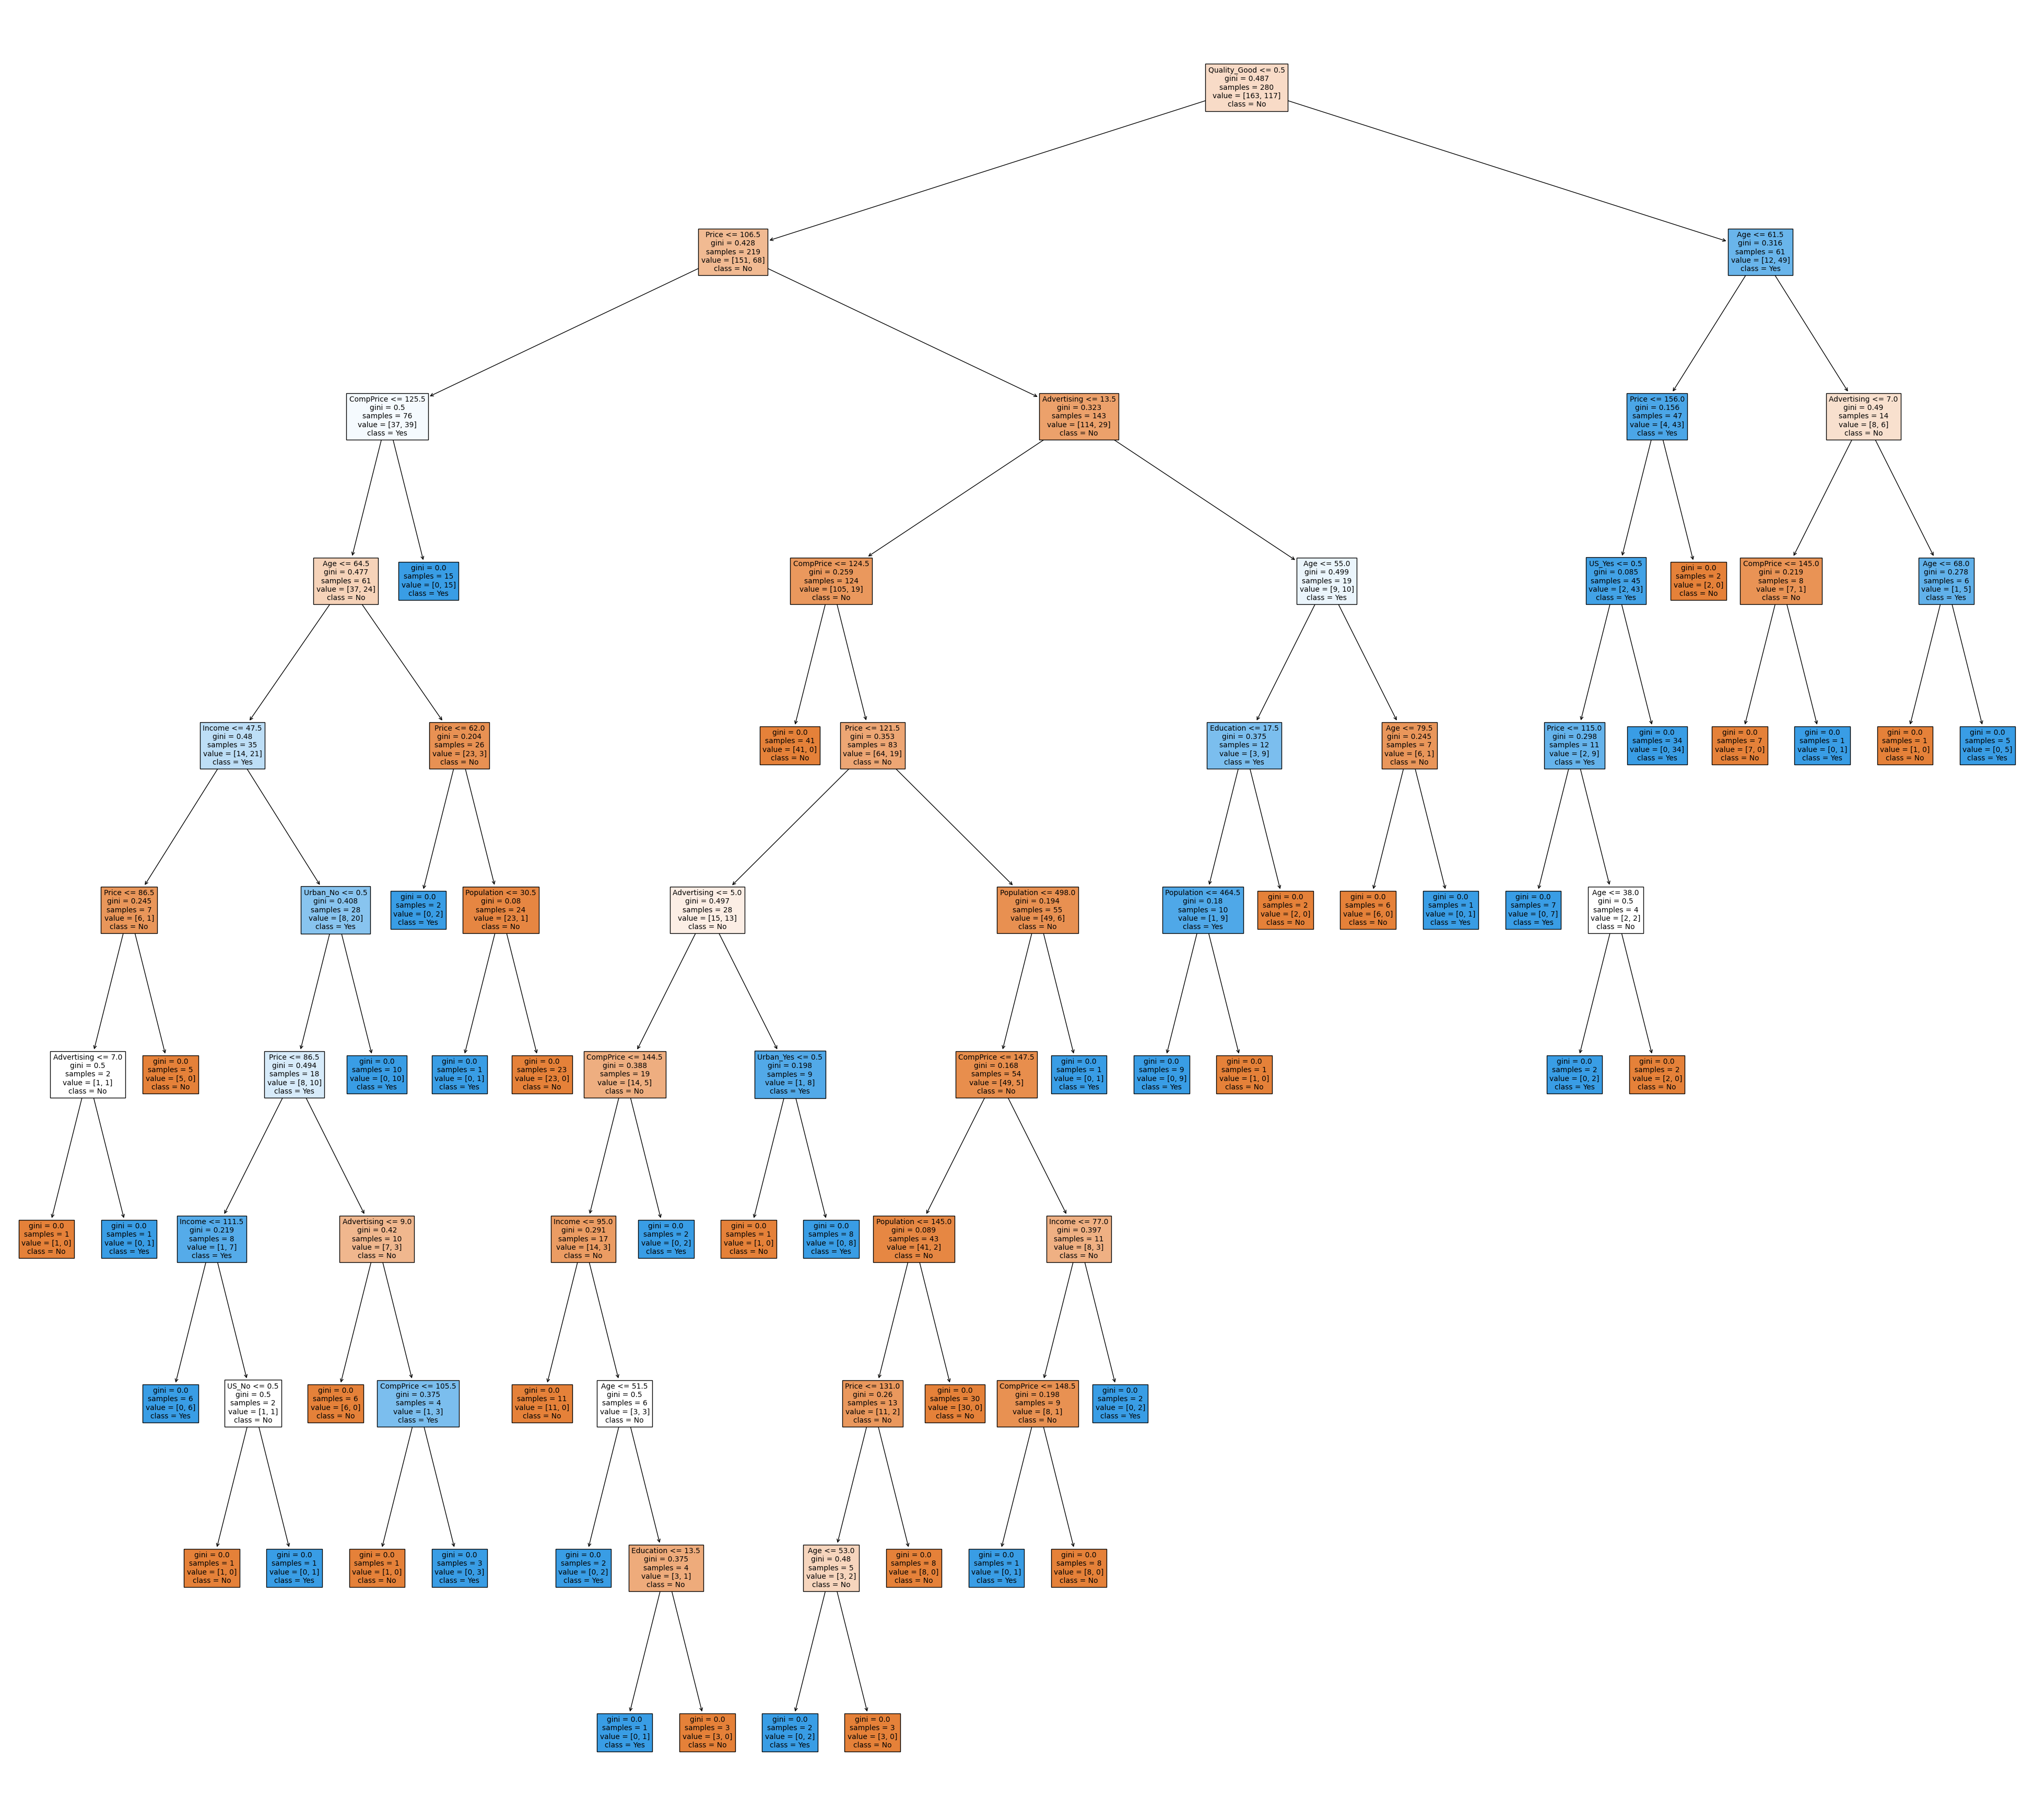

In [31]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=Y.value_counts().index,
                   filled=True)

In [32]:
fig.savefig("decistion_tree.png")

In [33]:
# Using Gini Index as criteria to choose best feature for tree as a root.

In [34]:
dt = tree.DecisionTreeClassifier(criterion='gini',random_state=100)

In [35]:
dtmodel = dt.fit(X_train, y_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [36]:
test_pred = dtmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

73.33333333333333

#### Very high training set accuracy is a sign of Model Overfitting (see lecture notes). It means model focused too much on training set that it fails to generalize the relationship for test set (unknow or new data)

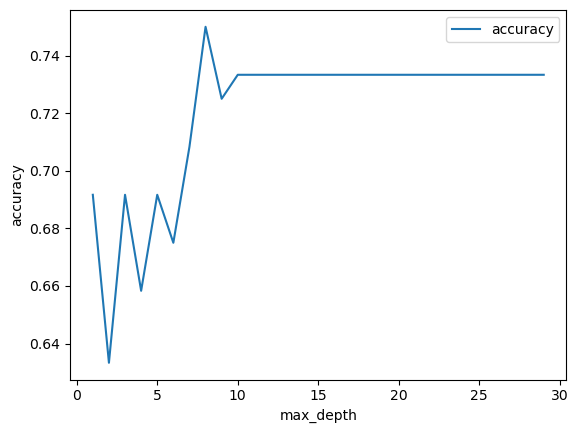

In [37]:
max_depth = []
acc = []
for i in range(1,30):
    dtree = tree.DecisionTreeClassifier(max_depth=i,random_state=100)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc.append(accuracy_score(y_test, pred))
    max_depth.append(i)
    
d = pd.DataFrame({'accuracy':pd.Series(acc),'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot(d['max_depth'].values,d['accuracy'].values)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(["accuracy"])

In [38]:
# Pruned Model

In [39]:
dt = tree.DecisionTreeClassifier(max_depth=8,random_state=100)

In [40]:
dtmodel = dt.fit(X_train, y_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

97.14285714285714

In [41]:
test_pred = dtmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

75.0

In [ ]:
# Pruning helped increasing the accuracy on test data

### Random Forest

n_estimators means number of decision trees

In [42]:
rf = RandomForestClassifier(n_estimators=100)

In [43]:
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [44]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

80.83333333333333

In [ ]:
## Better than Decision Trees

In [45]:
rfmodel.feature_importances_

array([0.10285242, 0.09989123, 0.11532124, 0.08378849, 0.18504369,
       0.12736064, 0.05475703, 0.05494356, 0.09791981, 0.02693809,
       0.0118024 , 0.0130151 , 0.01240613, 0.01396019])

<BarContainer object of 14 artists>

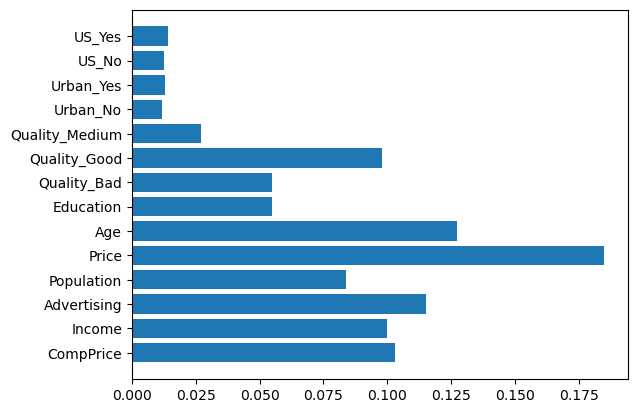

In [46]:
plt.barh(list(X.columns), rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

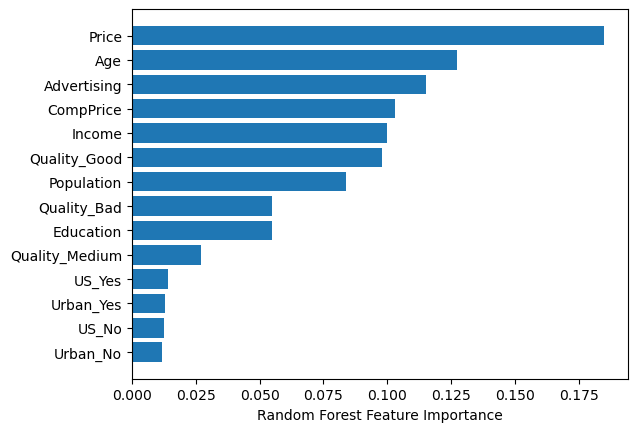

In [47]:
sorted_idx = rfmodel.feature_importances_.argsort()
plt.barh(list(X.columns[sorted_idx]), rfmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [49]:
## Cross Validation, to test the randomness in your data by picking random sets for testing

In [48]:
scores = cross_val_score(rfmodel, X, Y, cv=5)
scores

array([0.875 , 0.7625, 0.8125, 0.75  , 0.8625])

In [50]:
scores.mean()

0.8125

In [51]:
cm = confusion_matrix(y_train,train_pred)
cm

array([[163,   0],
       [  0, 117]], dtype=int64)

In [52]:
cm2 = confusion_matrix(y_test,test_pred)
cm2

array([[64,  9],
       [14, 33]], dtype=int64)

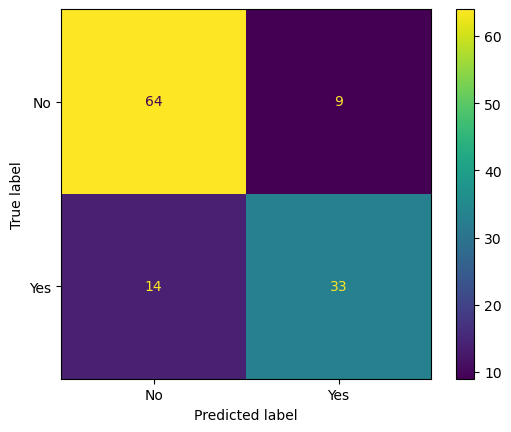

In [53]:
cp = ConfusionMatrixDisplay(cm2,display_labels=rfmodel.classes_)
cp.plot()

### Whisky Data

In [54]:
wdata = pd.read_csv('whiskeydataset.csv')

In [55]:
wdata.head()

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2
1,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2
2,Balblair,2,3,2,1,0,0,2,0,2,1,2,1
3,Balmenach,4,3,2,0,0,2,1,3,3,0,1,2
4,Dufftown,2,3,1,1,0,0,0,0,1,2,2,2


In [56]:
WX = wdata.drop(['Distillery'],axis=1)
WY = wdata['Distillery']

In [57]:
dt2 = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1,random_state=100)

In [58]:
dtmodel2 = dt2.fit(WX, WY)

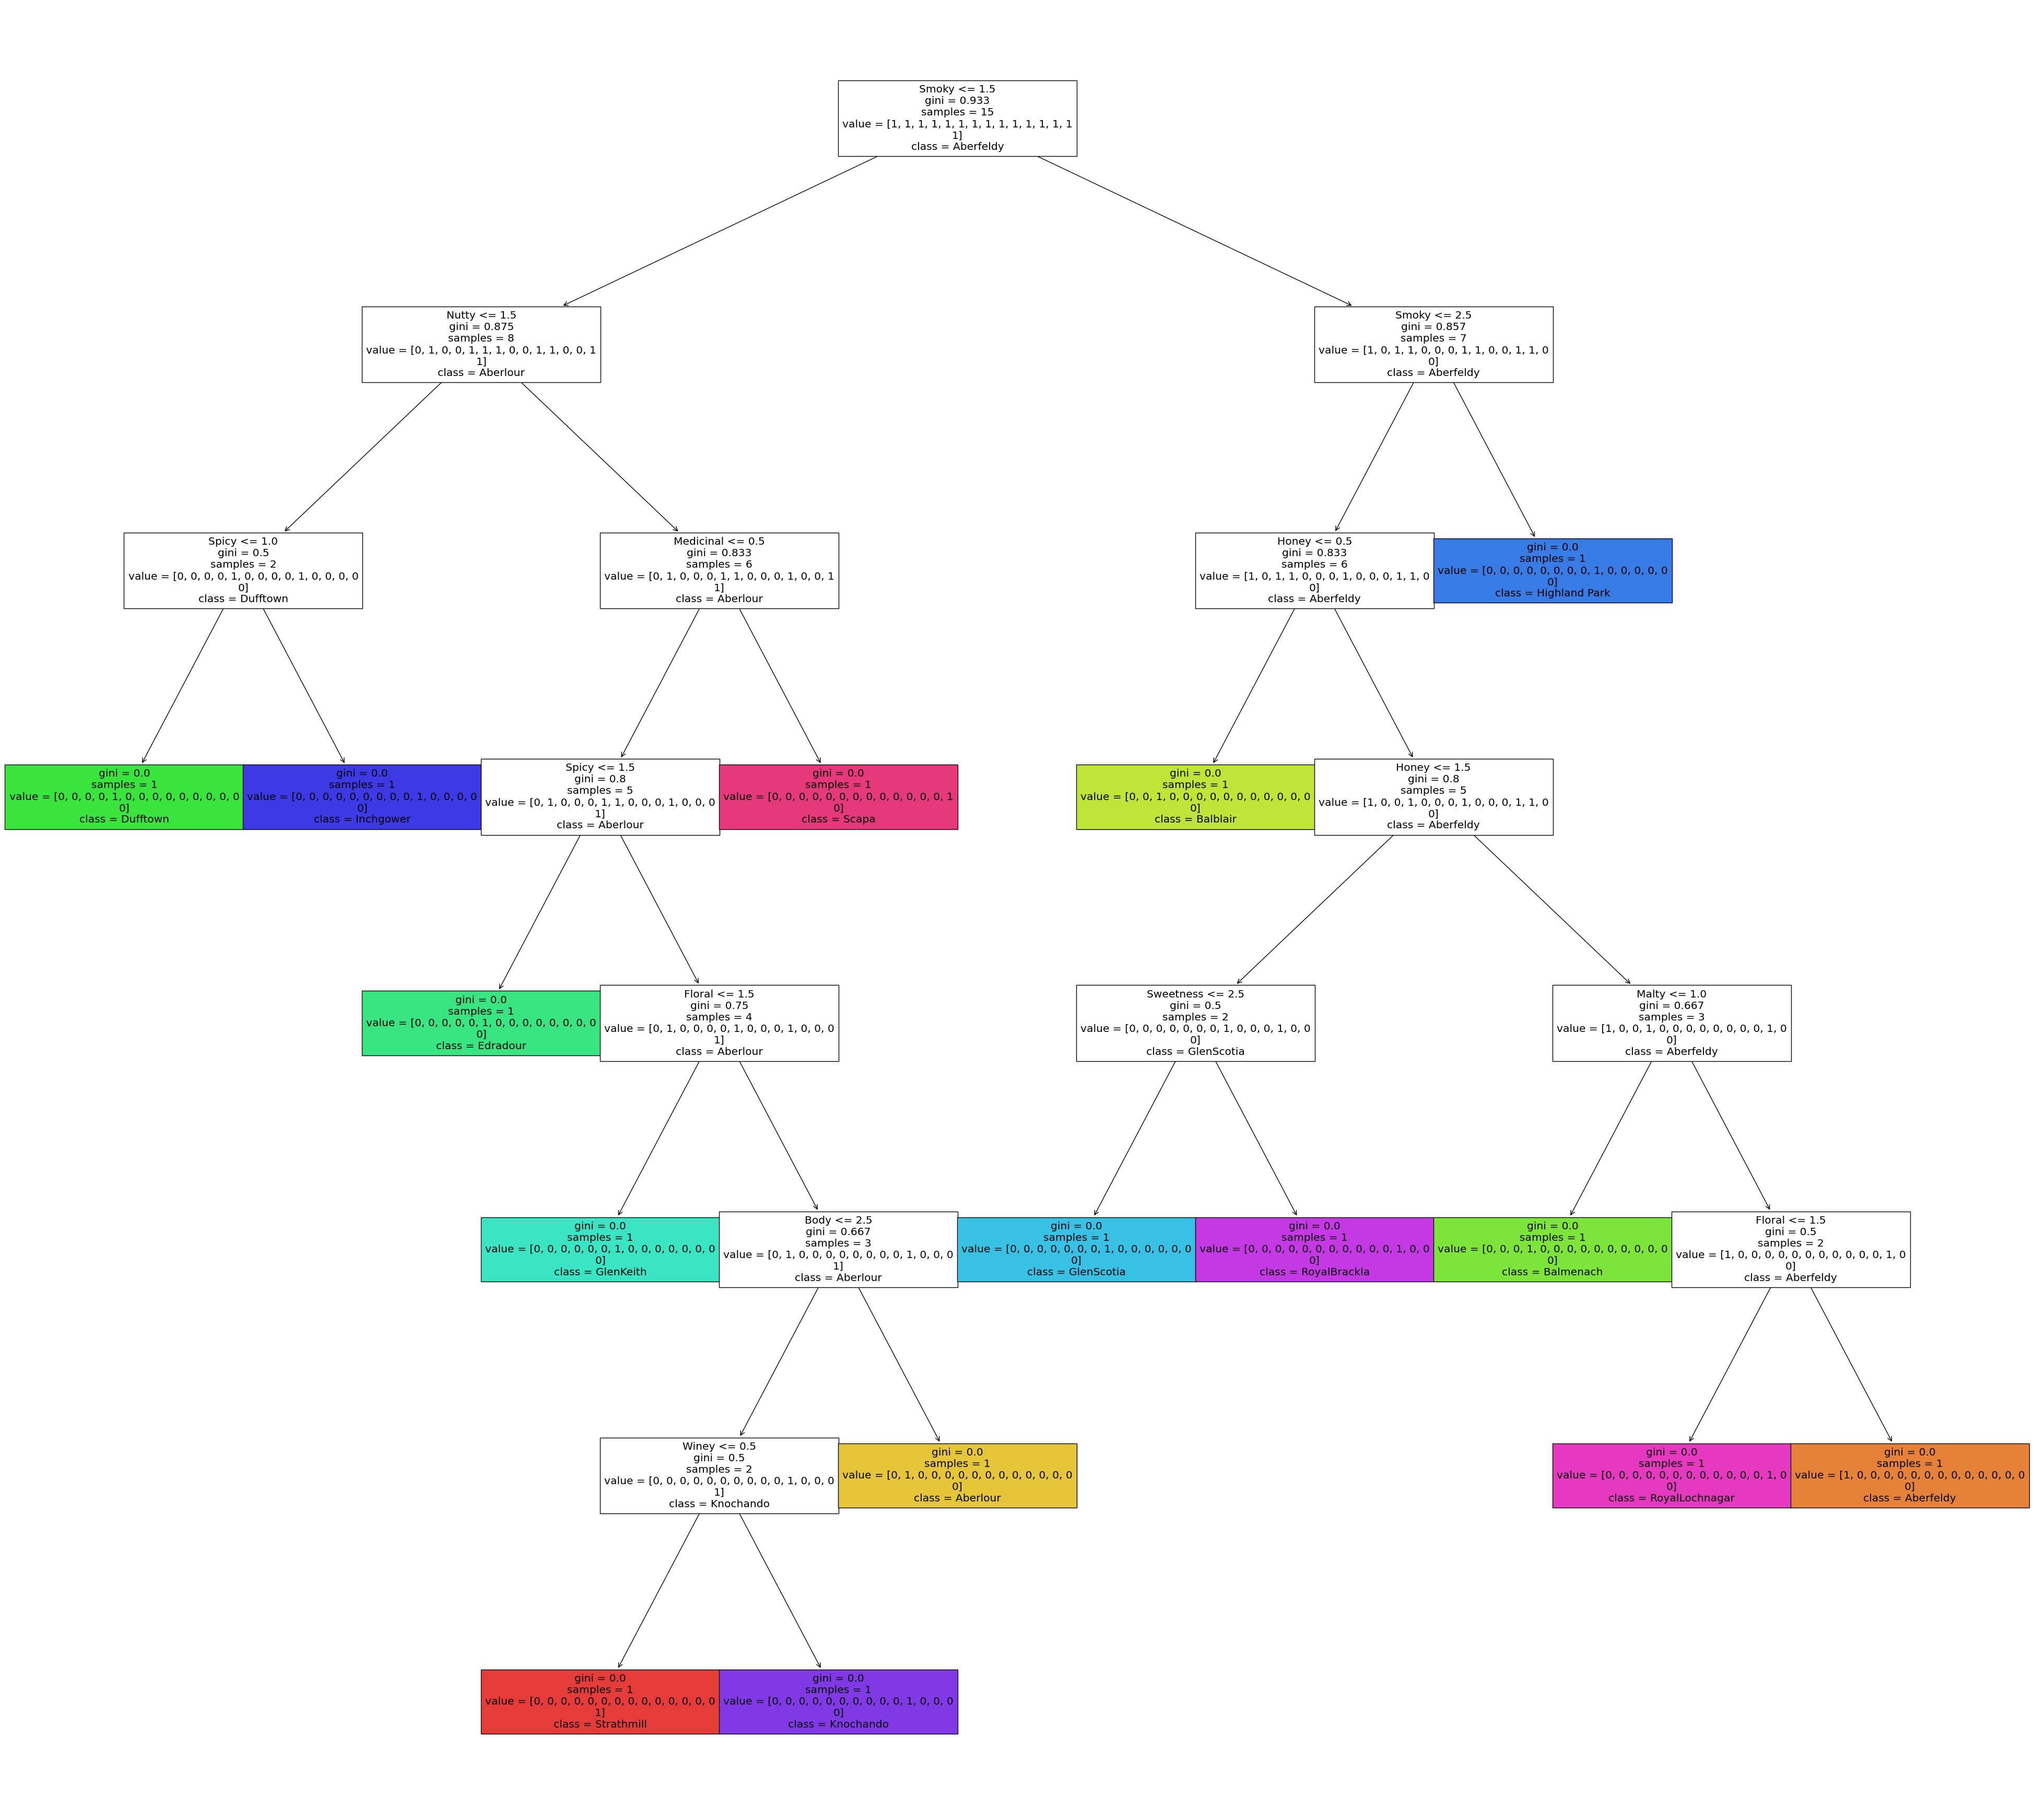

In [59]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel2, 
                   feature_names=list(WX.columns),  
                   class_names=WY.value_counts().index,
                   filled=True)

In [60]:
fig.savefig("wine_decision_tree.png")